In [1]:
from IPython.core.display import display, HTML
from IPython.display import Image, Video
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import scipy
from scipy import optimize

In [2]:
info_list = [
    ("0°,10',20\"", "video_on_ss1_hz_0_10_20.mp4", "video_off_ss1_hz_0_10_20.mp4"),
    ("5°,25',30\"", "video_on_ss1_hz_5_25_30.mp4", "video_off_ss1_hz_5_25_30.mp4"),
    ("10°,9',40\"", "video_on_ss1_hz_10_9_40.mp4", "video_off_ss1_hz_10_9_40.mp4"),
    ("15°,4',10\"", "video_on_ss1_hz_15_4_10.mp4", "video_off_ss1_hz_15_4_10.mp4"),
    ("20°,3',50\"", "video_on_ss1_hz_20_3_50.mp4", "video_off_ss1_hz_20_3_50.mp4"),
    ("25°,3',30\"", "video_on_ss1_hz_25_3_30.mp4", "video_off_ss1_hz_25_3_30.mp4"),
    ("30°,3',10\"", "video_on_ss1_hz_30_3_10.mp4", "video_off_ss1_hz_30_3_10.mp4"),
    ("35°,2',50\"", "video_on_ss1_hz_35_2_50.mp4", "video_off_ss1_hz_35_2_50.mp4"),
    ("40°,2',30\"", "video_on_ss1_hz_40_2_30.mp4", "video_off_ss1_hz_40_2_30.mp4"),
    ("45°,2',10\"", "video_on_ss1_hz_45_2_10.mp4", "video_off_ss1_hz_45_2_10.mp4"),
    ("50°,1',50\"", "video_on_ss1_hz_50_1_50.mp4", "video_off_ss1_hz_50_1_50.mp4"),
    ("55°,1',30\"", "video_on_ss1_hz_55_1_30.mp4", "video_off_ss1_hz_55_1_30.mp4")
]

data_dir = "/home/pkabra/Desktop/find_center/5deg/cal/"

0°,10',20" video_on_ss1_hz_0_10_20.mp4 video_off_ss1_hz_0_10_20.mp4
5°,25',30" video_on_ss1_hz_5_25_30.mp4 video_off_ss1_hz_5_25_30.mp4
10°,9',40" video_on_ss1_hz_10_9_40.mp4 video_off_ss1_hz_10_9_40.mp4
15°,4',10" video_on_ss1_hz_15_4_10.mp4 video_off_ss1_hz_15_4_10.mp4
20°,3',50" video_on_ss1_hz_20_3_50.mp4 video_off_ss1_hz_20_3_50.mp4
25°,3',30" video_on_ss1_hz_25_3_30.mp4 video_off_ss1_hz_25_3_30.mp4
30°,3',10" video_on_ss1_hz_30_3_10.mp4 video_off_ss1_hz_30_3_10.mp4
35°,2',50" video_on_ss1_hz_35_2_50.mp4 video_off_ss1_hz_35_2_50.mp4
40°,2',30" video_on_ss1_hz_40_2_30.mp4 video_off_ss1_hz_40_2_30.mp4
45°,2',10" video_on_ss1_hz_45_2_10.mp4 video_off_ss1_hz_45_2_10.mp4
50°,1',50" video_on_ss1_hz_50_1_50.mp4 video_off_ss1_hz_50_1_50.mp4
55°,1',30" video_on_ss1_hz_55_1_30.mp4 video_off_ss1_hz_55_1_30.mp4


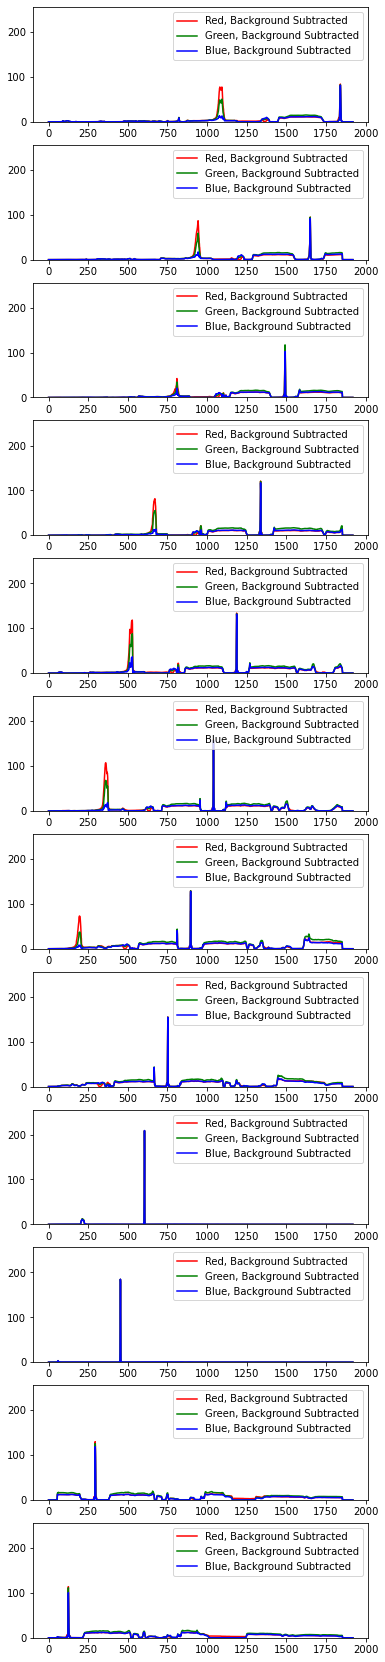

In [3]:
fig, ax = plt.subplots(len(info_list), 1, figsize=(6,30))

mean_frame_s = []

for i_cap, (title, fn_on, fn_off) in enumerate(info_list):
    print(title, fn_on, fn_off)

    vidcap_lighton = cv2.VideoCapture(os.path.join(data_dir, fn_on))
    vidcap_lightoff = cv2.VideoCapture(os.path.join(data_dir, fn_off))

    n_frames_lighton = int(vidcap_lighton.get(cv2.CAP_PROP_FRAME_COUNT))
    n_frames_lightoff = int(vidcap_lightoff.get(cv2.CAP_PROP_FRAME_COUNT))

    mean_frame_lighton = np.empty((int(vidcap_lighton.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(vidcap_lighton.get(cv2.CAP_PROP_FRAME_WIDTH)),3), dtype=int)
    mean_frame_lightoff = np.empty((int(vidcap_lightoff.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(vidcap_lightoff.get(cv2.CAP_PROP_FRAME_WIDTH)),3), dtype=int)

    successes = 0

    for i_image in range(n_frames_lighton):
        success, image = vidcap_lighton.read()
        if success:
            mean_frame_lighton = mean_frame_lighton + image
            successes += 1
    mean_frame_lighton = mean_frame_lighton.astype(float) / successes

    successes = 0
    for i_image in range(n_frames_lightoff):
        success, image = vidcap_lightoff.read()
        if success:
            mean_frame_lightoff = mean_frame_lightoff + image
            successes += 1
    mean_frame_lightoff = mean_frame_lightoff.astype(float) / successes

    mean_frame_s.append(
        (title, mean_frame_lighton / 255, mean_frame_lightoff / 255, (mean_frame_lighton - mean_frame_lightoff) / 255))
    
#------------------------------------------------------------------------------
# Plot1
#------------------------------------------------------------------------------
    i_height = np.argmax(np.max(np.mean((mean_frame_lighton - mean_frame_lightoff), axis=-1), axis=1)) # height of greatest value pixel

    # channelwise plot at i_height line of pixels
    ax[i_cap].plot(mean_frame_lighton[i_height,:,0] - mean_frame_lightoff[i_height,:1,0], color='red', label="Red, Background Subtracted") 
    ax[i_cap].plot(mean_frame_lighton[i_height,:,1] - mean_frame_lightoff[i_height,:1,1], color='green', label="Green, Background Subtracted")
    ax[i_cap].plot(mean_frame_lighton[i_height,:,2] - mean_frame_lightoff[i_height,:1,2], color='blue', label="Blue, Background Subtracted")
    
    ax[i_cap].set_ylim(0, 256)
    
    ax[i_cap].legend()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

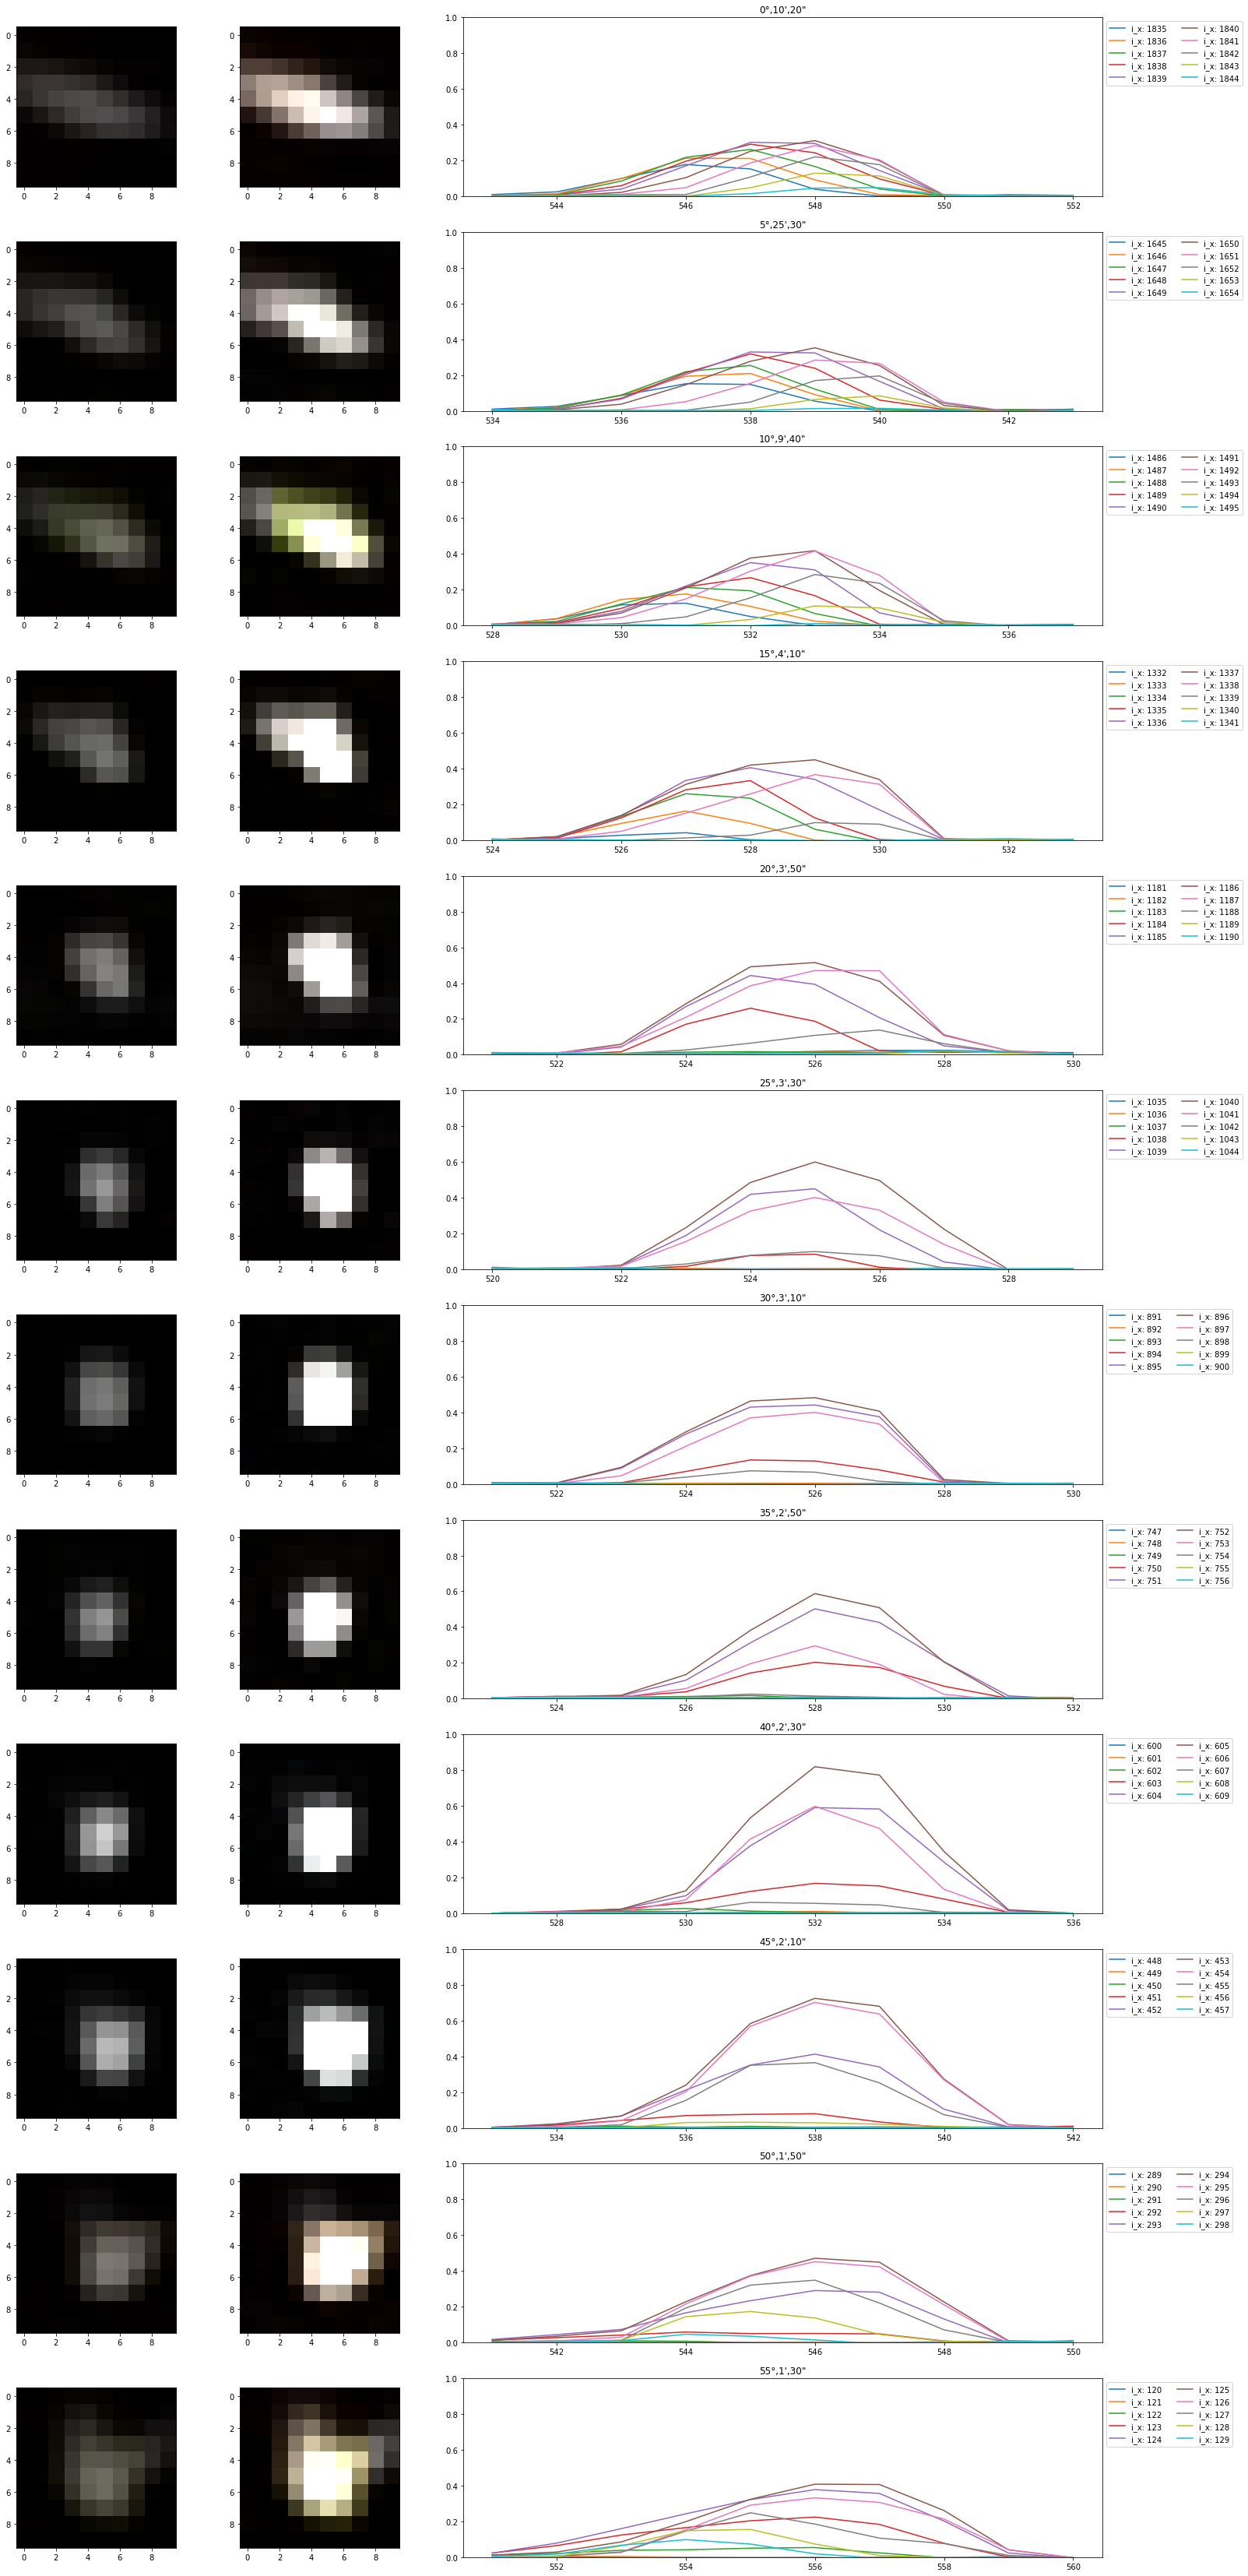

In [4]:
display_hw_px = 5


fig, ax = plt.subplots(len(info_list),3, figsize=(25,5*len(info_list)), gridspec_kw=dict(width_ratios=[1,1,4]))

for i_cap, ((title, fn_on, fn_off), (_, _, _, mean_frame_background_subtracted)) in enumerate(zip(info_list, mean_frame_s)):
    mean_grayscale_frame_background_subtracted = np.mean(mean_frame_background_subtracted, axis=-1)
    max_grayscale = np.max(mean_grayscale_frame_background_subtracted)
    ((i_y_max,), (i_x_max,)) = np.where(mean_grayscale_frame_background_subtracted == max_grayscale)
    
    weighting_function = lambda image: 10**image - 1
    image_weighted = weighting_function(mean_frame_background_subtracted[
    i_y_max - display_hw_px:i_y_max + display_hw_px,
    i_x_max - display_hw_px:i_x_max + display_hw_px])
    
    ax0 = ax[i_cap][0]
    ax0.imshow(
    mean_frame_background_subtracted[
    i_y_max - display_hw_px:i_y_max + display_hw_px,
    i_x_max - display_hw_px:i_x_max + display_hw_px],
    cmap=plt.cm.gray)
    
    ax1 = ax[i_cap][1]
    ax1.imshow(image_weighted,
    cmap=plt.cm.gray)
    
    ax2 = ax[i_cap][2]
    for i_x in range(i_x_max - display_hw_px, i_x_max + display_hw_px):
        ax2.plot(np.arange(i_y_max - display_hw_px, i_y_max + display_hw_px),
            mean_grayscale_frame_background_subtracted[
            i_y_max - display_hw_px:i_y_max + display_hw_px, i_x],
            label=f"i_x: {i_x}")
        
    ax2.set_ylim(0,1)
    ax2.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)
    ax2.set_title(title)


In [5]:
def weighting_function(image):
    return 10**image - 1
    # return image

In [6]:
def find_image_peak(mean_grayscale_frame_background_subtracted, box_threshold = 0.2, box_padding = 0, weighting_function = lambda image: 10**image - 1):


    max_over_x = np.max(mean_grayscale_frame_background_subtracted, axis=0)
    #max_over_x_over_threshold = max_over_x > box_threshold
    max_over_x_over_threshold = np.where(max_over_x > box_threshold, max_over_x, 0)
    i_xside_box_start = np.argmax(max_over_x_over_threshold) - box_padding
    i_xside_box_end = len(max_over_x_over_threshold) - np.argmax(max_over_x_over_threshold[::-1]) + box_padding

    max_over_y = np.max(mean_grayscale_frame_background_subtracted, axis=1)
    max_over_y_over_threshold = np.where(max_over_y > box_threshold, max_over_y, 0)
    i_yside_box_start = np.argmax(max_over_y_over_threshold) - box_padding
    i_yside_box_end = len(max_over_y_over_threshold) - np.argmax(max_over_y_over_threshold[::-1]) + box_padding


    x_ = np.arange(i_xside_box_end - i_xside_box_start)
    y_ = np.arange(i_yside_box_end - i_yside_box_start)

    X, Y = np.meshgrid(x_, y_)

    image_weighted = weighting_function(mean_grayscale_frame_background_subtracted[i_yside_box_start:i_yside_box_end, i_xside_box_start:i_xside_box_end])
    image_weighted_sum = np.sum(image_weighted)



    x_mean = np.sum(X * image_weighted) / image_weighted_sum

    y_mean = np.sum(Y * image_weighted) / image_weighted_sum

    return (i_xside_box_start + x_mean, i_yside_box_start + y_mean), (i_xside_box_start, i_xside_box_end, i_yside_box_start, i_yside_box_end)


In [7]:
image_peak_s = np.array([ find_image_peak(np.mean(mean_frame_background_subtracted,axis=-1))[0]
    for title, mean_frame_lighton, mean_frame_lightoff, mean_frame_background_subtracted in mean_frame_s ])
        
print('image_peak_s=',image_peak_s)

image_peak_s= [[1840.  548.]
 [1650.  539.]
 [1491.  533.]
 [1337.  529.]
 [1186.  526.]
 [1040.  525.]
 [ 896.  526.]
 [ 752.  528.]
 [ 605.  532.]
 [ 453.  538.]
 [ 294.  546.]
 [ 125.  556.]]


In [8]:
peak_pixels_s = []
bbox_s = []

for i_cap, ((title, fn_on, fn_off), (title, mean_frame_lighton, mean_frame_lightoff, mean_frame_background_subtracted)) in enumerate(zip(info_list, mean_frame_s)):
    
    vidcap_lighton = cv2.VideoCapture(os.path.join(data_dir, fn_on))

    n_frames_lighton = int(vidcap_lighton.get(cv2.CAP_PROP_FRAME_COUNT))

    peak_pixels = []
    frames = []
    for i_image in range(n_frames_lighton):
        success, image = vidcap_lighton.read()
        if success:
            image_peak, image_bbox = find_image_peak(np.mean(image/255. - mean_frame_lightoff, axis=-1), box_padding=0)
            peak_pixels.append(list(image_peak))
            frames.append(list(image_bbox))

    peak_pixels_s.append(np.array(peak_pixels))
    bbox_s.append(np.array(frames))

<ipython-input-9-afcb07085bc3>:7: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.autofmt_xdate()


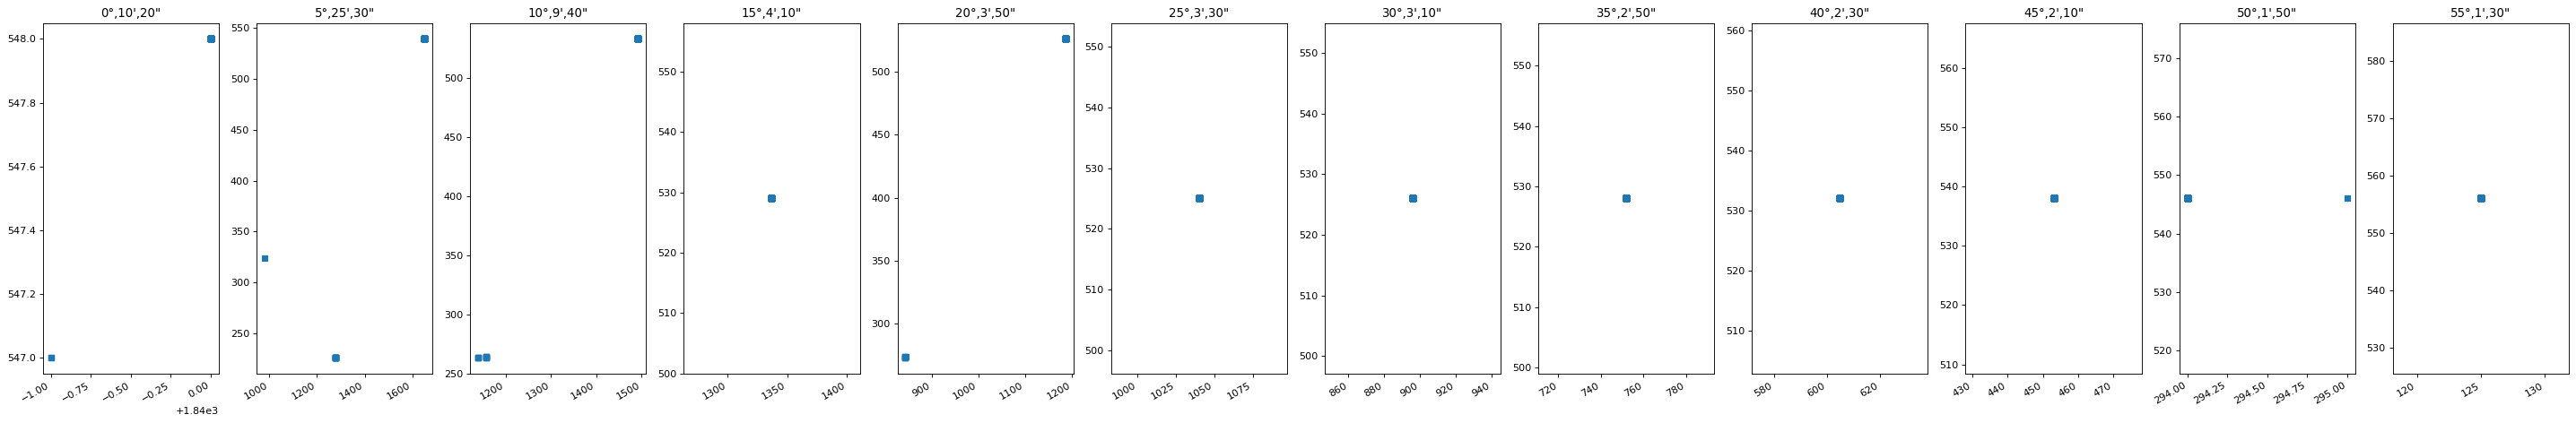

In [9]:
fig, ax = plt.subplots(1, len(info_list), figsize=(3*len(info_list),6), constrained_layout= True, dpi = 80)

for i_cap, ((title, fn_on, fn_off), peak_pixels) in enumerate(zip(info_list, peak_pixels_s)):
    axi = ax[i_cap]
    axi.scatter(peak_pixels[50:,0], peak_pixels[50:,1],marker='s')
    axi.set_title(title)
    fig.autofmt_xdate()
    plt.tight_layout()

In [10]:
peak_pixel_std_s = np.array([ np.std(peak_pixels[50:], axis=0) for peak_pixels in peak_pixels_s ])
print('peak_pixel_std_s= ',peak_pixel_std_s)

peak_pixel_std_s=  [[2.45670100e-01 2.45670100e-01]
 [1.81240255e+02 1.44722843e+02]
 [1.58454902e+02 1.24931298e+02]
 [0.00000000e+00 0.00000000e+00]
 [1.37321633e+02 1.01411518e+02]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.45061694e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


In [11]:
range_m = 6.

horizontal_fov_twosided_radians = np.radians(57.09) # empirical, 56.2135442 if calculated from datasheet info
vertical_fov_twosided_radians = np.radians(33.4439489474)   # calculated from datasheet info

radians_per_pixel_horizontal = horizontal_fov_twosided_radians / 1920
radians_per_pixel_vertical = vertical_fov_twosided_radians / 1080

print('radians_per_pixel_horizontal= ',radians_per_pixel_horizontal)
print('radians_per_pixel_vertical= ',radians_per_pixel_vertical)

radians_per_pixel_horizontal=  0.0005189627447726889
radians_per_pixel_vertical=  0.0005404694666676129


In [12]:
peak_radian_std_s = peak_pixel_std_s * np.array([radians_per_pixel_horizontal, radians_per_pixel_vertical])[None,:]
peak_radian_std_s

array([[1.27493630e-04, 1.32777188e-04],
       [9.40569401e-02, 7.82182777e-02],
       [8.22321906e-02, 6.75215523e-02],
       [0.00000000e+00, 0.00000000e+00],
       [7.12648118e-02, 5.48098293e-02],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [7.52816150e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]])

In [13]:
peak_cross_position_std_s = peak_radian_std_s * range_m
print('peak_cross_position_std_s= ',peak_cross_position_std_s)

peak_cross_position_std_s=  [[7.64961777e-04 7.96663128e-04]
 [5.64341641e-01 4.69309666e-01]
 [4.93393144e-01 4.05129314e-01]
 [0.00000000e+00 0.00000000e+00]
 [4.27588871e-01 3.28858976e-01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [4.51689690e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


In [14]:
image_center = [954.5,529.5]
peak_pixel_median_s = np.array([ np.median(peak_pixels, axis=0) for peak_pixels in peak_pixels_s ])
print('peak_pixel_median_s= ',peak_pixel_median_s)

peak_pixel_median_from_center_s = -(peak_pixel_median_s-image_center)

peak_pixel_median_s=  [[1840.  548.]
 [1650.  539.]
 [1491.  533.]
 [1337.  529.]
 [1186.  526.]
 [1040.  525.]
 [ 896.  526.]
 [ 752.  528.]
 [ 605.  532.]
 [ 453.  538.]
 [ 294.  546.]
 [ 125.  556.]]


In [15]:
nominal_angle_radians = np.radians(np.array([
    0 + 10/60 + 20/3600,
    5 + 25/60 + 30/3600,
    10 + 9/60 + 40/3600,
    15 + 4/60 + 10/3600,
    20 + 3/60 + 50/3600,
    25 + 3/60 + 30/3600,
    30 + 3/60 + 10/3600,
    35 + 2/60 + 50/3600,
    40 + 2/60 + 30/3600,
    45 + 2/60 + 10/3600,
    50 + 1/60 + 50/3600,
    55 + 1/60 + 30/3600,

]))

params:  [0.52635661 0.49141284]


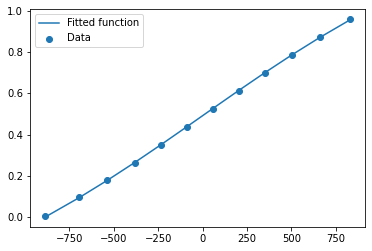

In [16]:
#------------------------------------------------------------------------------
# Scipy optimize
#------------------------------------------------------------------------------
x_data = peak_pixel_median_from_center_s[:,0]
y_data = nominal_angle_radians

def test_func(x, fov, theta_led_tms):
    return np.arctan(x/960 * math.tan(fov))+ theta_led_tms

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print('params: ',params)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')
plt.show()

In [17]:
print('nominal_angle_radians=',nominal_angle_radians)

nominal_angle_radians= [0.00300584 0.09468411 0.17734484 0.26301142 0.35018092 0.43735042
 0.52451992 0.61168942 0.69885892 0.78602842 0.87319792 0.96036742]


In [18]:
computed_angles_radians = test_func(peak_pixel_median_from_center_s[:,0], params[0], params[1]) 
print('computed_angles_radians:', computed_angles_radians)

computed_angles_radians: [-5.73766967e-04  9.29805527e-02  1.77440671e-01  2.63915118e-01
  3.52205335e-01  4.39710681e-01  5.26804767e-01  6.13366331e-01
  6.99872273e-01  7.86104416e-01  8.71714875e-01  9.56698341e-01]


In [19]:
peak_radian_std_s = test_func(peak_pixel_std_s[:,0], params[0], params[1])
print('peak_radian_std_s= ',peak_radian_std_s)

peak_radian_std_s=  [0.49156153 0.6006704  0.58702414 0.49141284 0.57433521 0.49141284
 0.49141284 0.49141284 0.49141284 0.49141284 0.49150063 0.49141284]


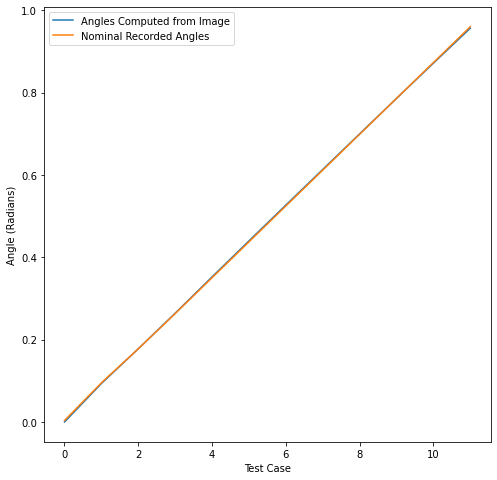

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(computed_angles_radians, label="Angles Computed from Image")
plt.plot(nominal_angle_radians, label="Nominal Recorded Angles")
plt.xlabel("Test Case")
plt.ylabel("Angle (Radians)")
plt.legend(loc='best')
plt.show()

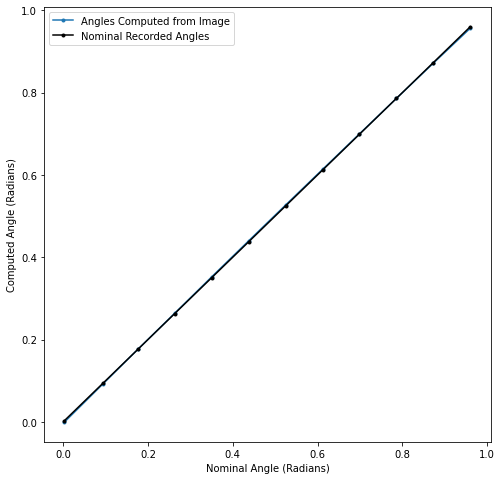

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(nominal_angle_radians, computed_angles_radians, marker='.', label="Angles Computed from Image")
plt.plot(nominal_angle_radians, nominal_angle_radians, color='black', marker='.',label="Nominal Recorded Angles")
plt.xlabel("Nominal Angle (Radians)")
plt.ylabel("Computed Angle (Radians)")
plt.legend(loc='best')
plt.show()

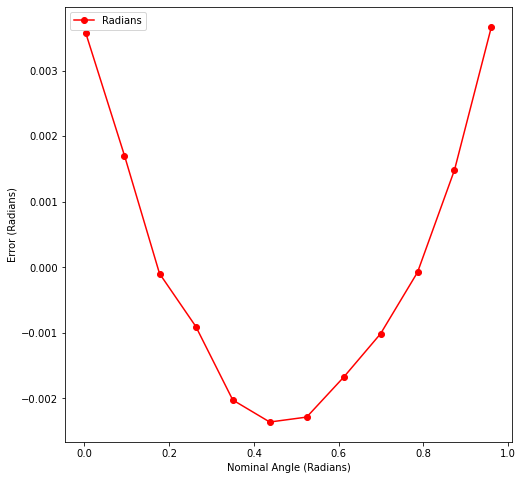

In [22]:
error = nominal_angle_radians-computed_angles_radians

plt.figure(figsize=(8, 8))
plt.plot(nominal_angle_radians, error, '-ro',label="Radians")
plt.xlabel("Nominal Angle (Radians)")
plt.ylabel("Error (Radians)")
plt.legend(loc='best')
plt.show()